In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Company_Data.csv")

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc'] = label_encoder.fit_transform(data['ShelveLoc'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])


In [5]:
x = data.iloc[:,1:]
y = data['Sales']
print(y.min())
print(y.max())

0.0
16.27


In [6]:
data.insert(11,"sales_cat",'')

In [7]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,
396,6.14,139,23,3,37,120,2,55,11,0,1,
397,7.41,162,26,12,368,159,2,40,18,1,1,
398,5.94,100,79,7,284,95,0,50,12,1,1,


In [8]:
for i in range (0,len(data['Sales'])):
    if data['Sales'][i]>=0 and data['Sales'][i]<=6:
        data['sales_cat'][i]='low'
    elif data['Sales'][i]> 6 and data['Sales'][i]<=9:
        data['sales_cat'][i]='medium'
    elif data['Sales'][i]> 9:
        data['sales_cat'][i]='high'

In [9]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,medium
4,4.15,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,medium
397,7.41,162,26,12,368,159,2,40,18,1,1,medium
398,5.94,100,79,7,284,95,0,50,12,1,1,low


In [10]:
data.sales_cat.value_counts()

medium    157
low       130
high      113
Name: sales_cat, dtype: int64

# EDA 

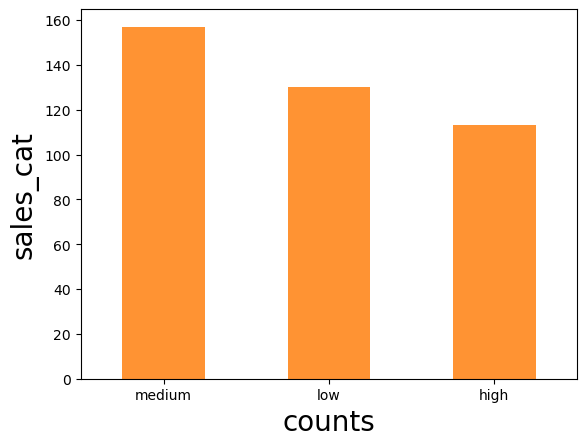

In [14]:
data.sales_cat.value_counts().plot(kind='bar',color="#FF9333")
plt.xlabel("counts",size=20)
plt.ylabel("sales_cat",size=20)
plt.xticks(rotation="0")
plt.show()

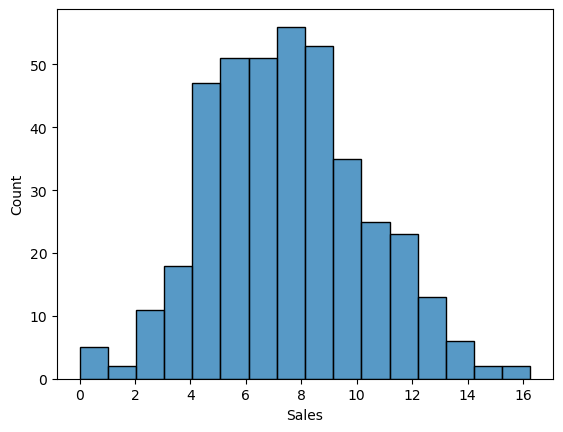

In [21]:
sns.histplot(x='Sales',data=data)
plt.show()

In [22]:
label_encoder = preprocessing.LabelEncoder()
data['sales_cat']= label_encoder.fit_transform(data['sales_cat']) 

In [23]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,2
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,2
397,7.41,162,26,12,368,159,2,40,18,1,1,2
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [24]:
data['sales_cat'].unique()

array([0, 2, 1])

In [25]:
data.sales_cat.value_counts()

2    157
1    130
0    113
Name: sales_cat, dtype: int64

In [26]:
x = data.iloc[:, 1:-1]
y = data.iloc[:,-1]
y

0      0
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    0
Name: sales_cat, Length: 400, dtype: int32

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [28]:
y_train

276    2
251    1
29     2
109    2
244    2
      ..
299    0
22     1
72     1
15     2
168    2
Name: sales_cat, Length: 300, dtype: int32

# Building Decision Tree classifier using Gini Criteria

In [29]:
model = DecisionTreeClassifier(criterion='gini', min_samples_split=5,max_depth=10)

Checking accuracy for training data

In [30]:
model.fit(x_train,y_train)
pred = model.predict(x_train)
pd.Series(pred).value_counts()

2    124
1     94
0     82
dtype: int64

In [31]:
metrics.accuracy_score(pred,y_train)

0.9466666666666667

Checking accuracy for testing data

In [32]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
pd.Series(pred).value_counts()

2    39
0    33
1    28
dtype: int64

In [33]:
metrics.accuracy_score(pred,y_test)

0.63

# Building Decision Tree classifier using Entrophy Criteria

In [34]:
model = DecisionTreeClassifier(criterion='entropy',min_samples_split=5)

In [35]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
metrics.accuracy_score(pred,y_test)

0.58

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.62      0.67      0.65        30
           1       0.68      0.64      0.66        33
           2       0.46      0.46      0.46        37

    accuracy                           0.58       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.58      0.58      0.58       100




# BAGGING

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

num_trees = 100
model = BaggingClassifier(max_samples=0.8, n_estimators=num_trees,random_state=8)

model.fit(x_train,y_train)
pred = model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        33
           1       0.81      0.71      0.75        41
           2       0.58      0.63      0.60        46

    accuracy                           0.68       120
   macro avg       0.69      0.68      0.68       120
weighted avg       0.68      0.68      0.68       120



# RANDOM FOREST CLASSIFICATION

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

num_trees = 140
max_features = 6

model = RandomForestClassifier(n_estimators=num_trees,max_samples=0.8, max_features=max_features, random_state = 8)

model.fit(x_train,y_train)

pred = model.predict(x_test)

print(classification_report(y_test,pred))

results = cross_val_score(model, x_train, y_train, cv=10)
print(results)
print(results.mean())

              precision    recall  f1-score   support

           0       0.67      0.64      0.65        25
           1       0.77      0.77      0.77        30
           2       0.70      0.71      0.70        45

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100

[0.6        0.56666667 0.7        0.76666667 0.73333333 0.6
 0.73333333 0.7        0.63333333 0.33333333]
0.6366666666666666
